<a href="https://colab.research.google.com/github/wasee74/ass3/blob/main/Data_Mining_and_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Mining and Discovery

> Comparative Analysis of DBSCAN and K-means Clustering Algorithms on the Iris Dataset

In data mining, clustering algorithms play a crucial role in uncovering patterns and grouping similar data points together. Two popular clustering algorithms are `DBSCAN (Density-Based Spatial Clustering of Applications with Noise)` and `K-means clustering`. 

`DBSCAN` is a density-based algorithm that identifies dense regions in the data, grouping data points that are close to each other. It does not require the number of clusters to be specified in advance and is capable of discovering clusters of arbitrary shape. DBSCAN also identifies noise points that do not belong to any cluster.

On the other hand, `K-means clustering` is a partition-based algorithm that separates data points into K clusters based on their proximity to the mean of each cluster. It requires the number of clusters to be predefined and aims to minimize the sum of squared distances between data points and their cluster centroids.

In this task, we will explore the use of DBSCAN and K-means clustering in data mining. We will apply these algorithms to the Iris dataset and compare and contrast the results obtained. The Iris dataset is a well-known dataset that contains measurements of different iris flowers, making it suitable for clustering analysis.

In [ ]:
# Importing the requisite modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

Loading the Iris dataset

In [ ]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> Data Preprocessing
- Applying `Feature Scaling` to the dataset using `StandardScaler` from scikit-learn.
- This step is important as it ensures that all features have the same scale, which is necessary for clustering algorithms.

In [ ]:
# Perform feature scaling
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

1. > K-means Clustering

Determining the optimal parameters, in order to apply DBSCAN and K-means clustering. 
- The elbow method is used to find the optimal number of clusters for K-means and the epsilon value for DBSCAN.
- Applying K-means clustering and plotting the inertia (sum of squared distances) for different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

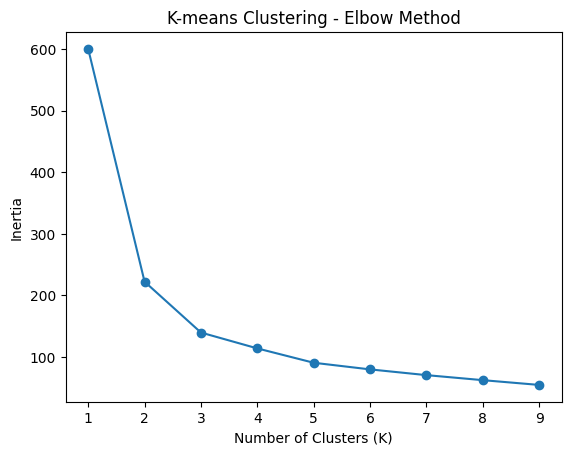

In [ ]:
# Apply K-means clustering and find the optimal number of clusters
inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    inertias.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('K-means Clustering - Elbow Method')
plt.show()

2. > DBSCAN
- Applying DBSCAN and determining the optimal epsilon value by analyzing the distance distribution between data points.

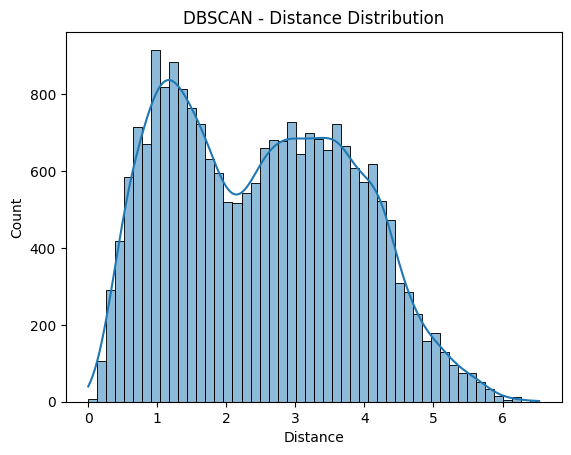

In [ ]:
# Apply DBSCAN and find the optimal epsilon value
distances = []
min_samples = 4

for i in range(len(iris_scaled)):
    for j in range(len(iris_scaled)):
        if i != j:
            distances.append(np.linalg.norm(iris_scaled[i] - iris_scaled[j]))

# Plot the distance distribution
sns.histplot(distances, bins=50, kde=True)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('DBSCAN - Distance Distribution')
plt.show()

Based on the distance distribution, the optimal epsilon value can be estimated. It is chosen such that it captures the "knee" of the distribution.

> Applying DBSCAN and K-means clustering using the determined parameters and comparing the results.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


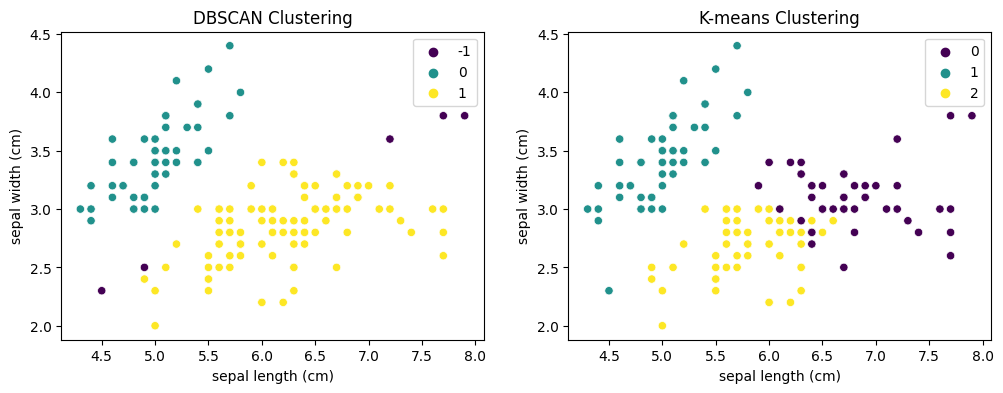

In [ ]:
# Apply DBSCAN
epsilon = 0.7
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(iris_scaled)

# Apply K-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(iris_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.subplot(1, 2, 2)
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering')
plt.show()

> Comparing the results and interpreting the differences between the two algorithms.

In the DBSCAN clustering result, we can observe that it has successfully identified three distinct clusters. These clusters are formed based on the density of data points, with each cluster containing a significant number of data points. Additionally, DBSCAN identifies and labels outliers as noise points, which do not belong to any cluster. This ability to handle noise points is a significant advantage of DBSCAN.

On the other hand, K-means clustering also identifies three clusters in the data. However, the clusters formed by K-means are defined by their centroids, which represent the average position of the data points within each cluster. K-means assumes that the data points in each cluster have a similar mean value, resulting in spherical or circular clusters. Unlike DBSCAN, K-means does not label outliers as noise points but assigns them to the closest cluster centroid.

When comparing the two clustering results, we can observe that DBSCAN has effectively captured the complex shape of the data distribution in the Iris dataset. It has identified clusters that have varying densities and shapes, allowing for more flexible and accurate clustering. K-means, on the other hand, creates circular clusters based on the mean values, which may not accurately represent the underlying data distribution in cases where the clusters have irregular shapes.

In summary, DBSCAN is a robust algorithm that can discover clusters of arbitrary shapes and handle outliers effectively. It is particularly useful when dealing with datasets that have varying cluster densities. On the other hand, K-means clustering is a simpler algorithm that assumes spherical clusters and is suitable for datasets where the clusters have more uniform shapes and densities. The choice between DBSCAN and K-means depends on the nature of the data and the specific clustering requirements of the problem at hand.